1 Assignment 05 

1.1 Data Analytics II 

1. Implement logistic regression using Python/R to perform 
classification on So cial_Network_Ads.csv dataset. 

2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset. 


1.1.1 Five Basic Operations 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings 

In [ ]:
warnings.filterwarnings('ignore') # It removes the Warning messages form␣ ,→the outputs 

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv') 

In [ ]:
 df.head(10) 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
df.shape 

(400, 5)

In [ ]:
 df.describe() 

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
 df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
 df.isnull().sum() 

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

1.1.2 Gender Catgories Change 

In [ ]:
 df['Gender'].value_counts() 

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
df['Gender'].replace(['Female', 'Male'], [0, 1], inplace = True)

In [ ]:
 df.head(10) 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


1.1.3 Perform EDA (Exploratory Data Analysis) 

In [ ]:
import matplotlib.pyplot as plt 

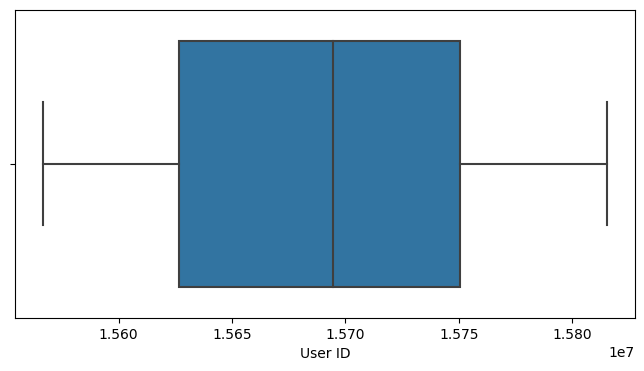

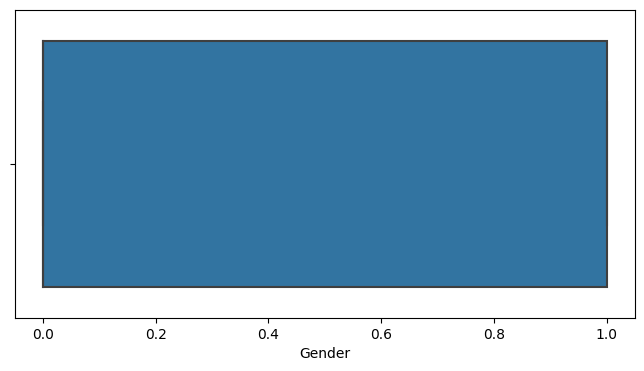

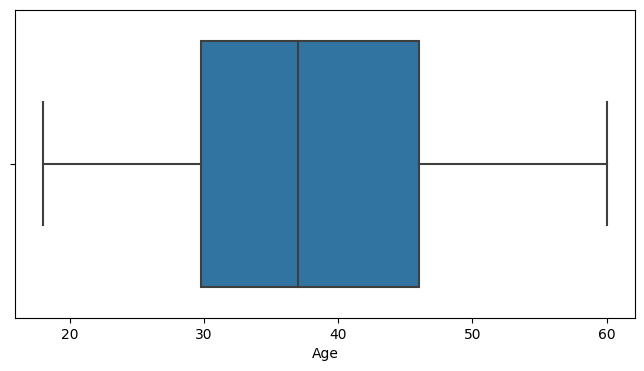

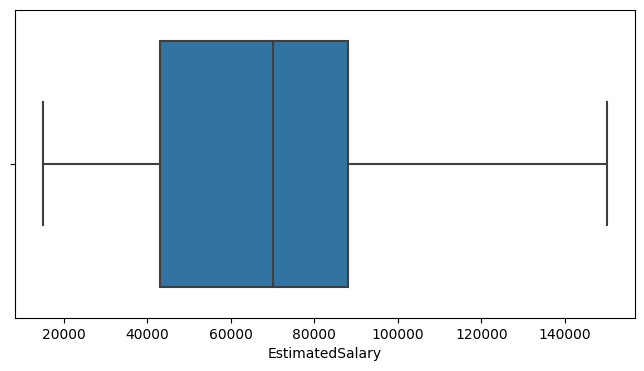

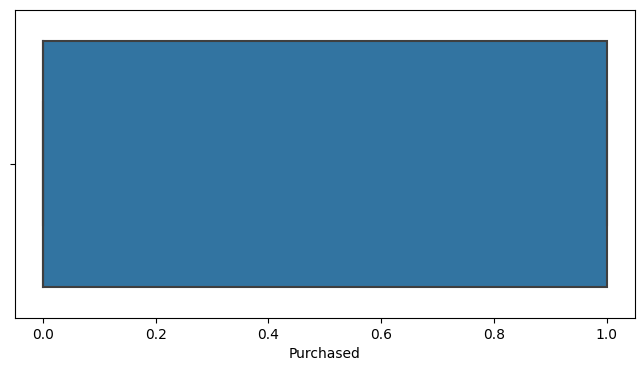

In [ ]:
for i in df.columns: 
  plt.figure(figsize = (8, 4)) 
  sns.boxplot(x = i, data = df) 
  plt.show() 

In [ ]:
df['User ID'].value_counts() 
 # Droping unique valeues 

15624510    1
15767681    1
15589449    1
15791373    1
15688172    1
           ..
15675185    1
15792102    1
15722758    1
15745232    1
15594041    1
Name: User ID, Length: 400, dtype: int64

In [ ]:
 df.drop(['User ID'], axis = 1, inplace = True) 

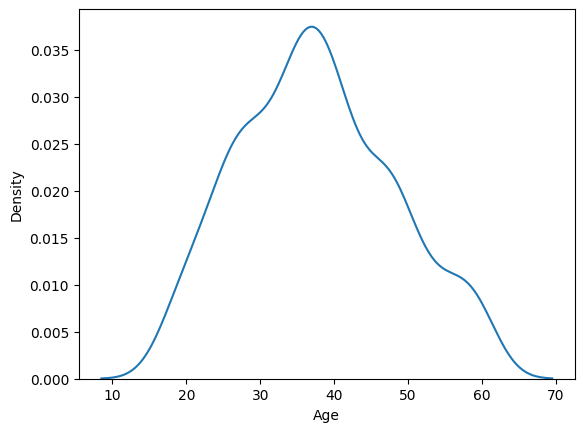

In [ ]:
sns.kdeplot(x = 'Age', data = df) 
plt.show() 

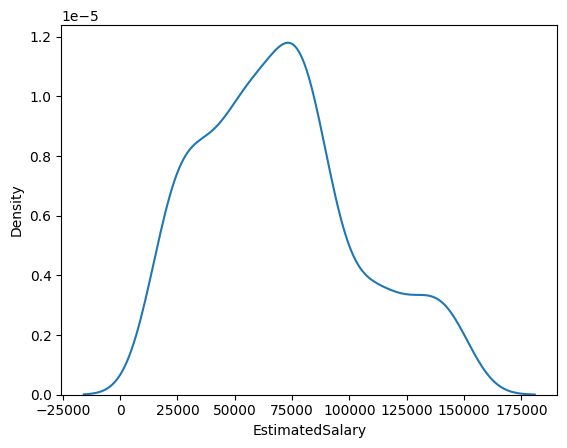

In [ ]:
sns.kdeplot(x = 'EstimatedSalary', data = df) 
plt.show() 

In [ ]:
df['EstimatedSalary'].skew() # Normally Distributed 

0.49502362888993623

In [ ]:
df['Age'].skew() # Normally Distributed 

0.23133746309642822

<Axes: xlabel='Gender', ylabel='count'>

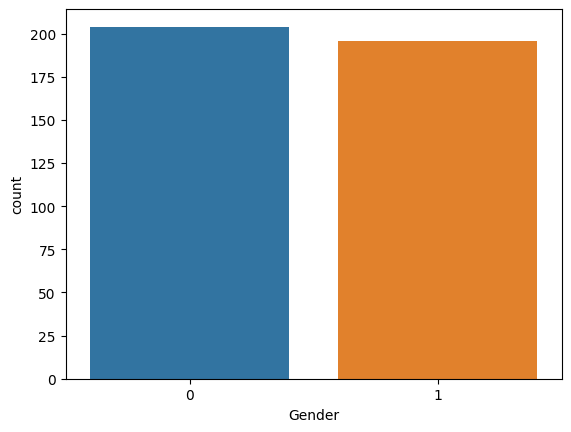

In [ ]:
sns.countplot(x = 'Gender', data = df) 

<Axes: xlabel='Purchased', ylabel='count'>

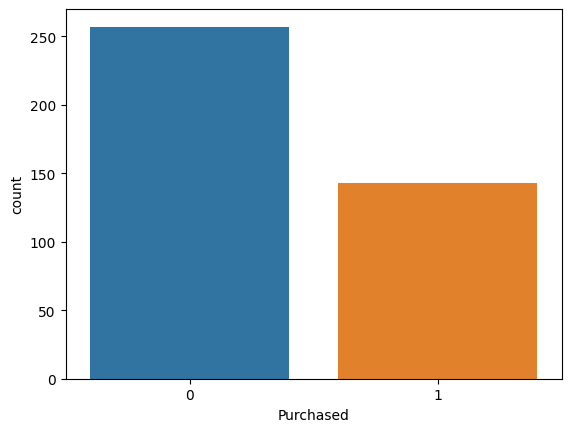

In [ ]:
sns.countplot(x = 'Purchased', data = df) 

1.1.4 Build Logistic Regression Model 

In [ ]:
 X = df.iloc[ : , : -1] 
 y = df.iloc[ : , -1] 

In [ ]:
X


,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 0) 

In [ ]:
X_train.shape 

(320, 3)

In [ ]:
 X_test.shape 

(80, 3)

In [ ]:
y_train.shape

(320,)

In [ ]:
 y_test.shape 

(80,)

1.1.6 Scaling of the dataset 

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
scaler = StandardScaler() 

In [ ]:
 X_train = scaler.fit_transform(X_train) 

In [ ]:
 X_test = scaler.transform(X_test) 

<Axes: ylabel='Density'>

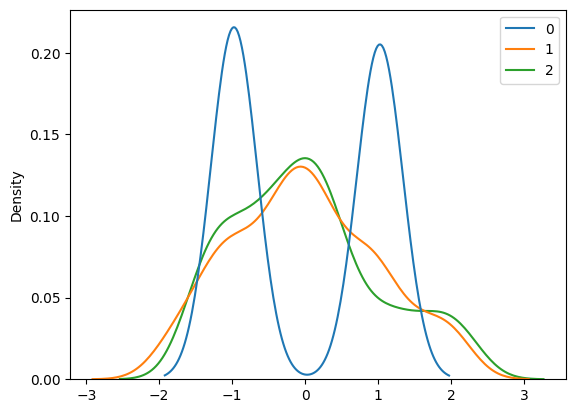

In [ ]:
sns.kdeplot(X_train) 

<Axes: ylabel='Density'>

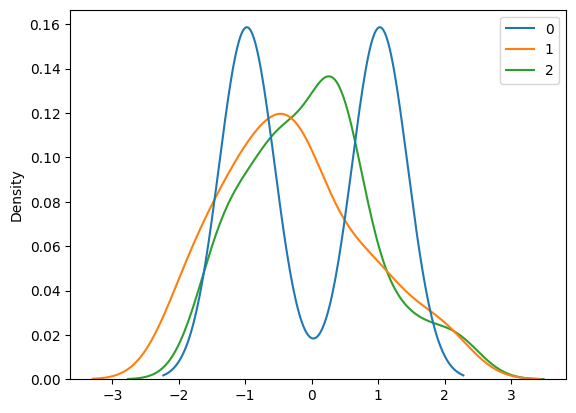

In [ ]:
sns.kdeplot(X_test) 

1.1.7 Create Logistic Regression Object 

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
LogReg = LogisticRegression() 

1.1.8 Train the model 

In [ ]:
LogReg.fit(X_train, y_train)
 

LogisticRegression()

In [ ]:
LogisticRegression()  

LogisticRegression()

1.1.9 Test the model

In [ ]:
y_predict = LogReg.predict(X_test)

In [ ]:
y_predict 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

1.1.10 Evaluate the model 

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
recall_score)

In [ ]:
confusion_matrix(y_test, y_predict)

array([[56,  2],
       [ 5, 17]])

In [ ]:
accuracy_score(y_test, y_predict) 

0.9125

In [ ]:
precision_score(y_test, y_predict)
 

0.8947368421052632

In [ ]:
recall_score(y_test, y_predict) 

0.7727272727272727